## packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import glob

In [21]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [22]:
%matplotlib inline

# Yelp dataset

## live dataset from yelp

In [48]:
data_directory = r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners\yelp_dataset' + '\\'
path = data_directory + 'yelp_academic_dataset_business.json'
df_b = pd.read_json(path, lines=True)

In [49]:
df_b.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [68]:
df = df_b.dropna()

In [74]:
df[df.dropna().categories.str.contains('Food|Restaurant') & df.city == 'Santa Barbara']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [79]:
df[df['city']=='Santa Barbara'][df.dropna().categories.str.contains('Restaurant')]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17616\1665998319.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['city']=='Santa Barbara'][df.dropna().categories.str.contains('Restaurant')]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
431,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
1320,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,"1213 State St, Ste L",Santa Barbara,CA,93101,34.423302,-119.705471,4.5,116,1,"{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...","Themed Cafes, Cafes, Pets, Arts & Entertainmen...","{'Monday': '10:0-17:15', 'Wednesday': '10:0-19..."
1417,Hqz96v1ymucUKNzIWfEKXw,Subway,"1936 State St, Ste B",Santa Barbara,CA,93101,34.430822,-119.714156,3.0,5,0,"{'Alcohol': 'u'none'', 'Caters': 'True', 'Bike...","Restaurants, Delis, Sandwiches, Fast Food","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149317,HrnSaz2f1WUEoAQQ6iD6gw,Lemon Tree Inn,2819 State St,Santa Barbara,CA,93105,34.438226,-119.725035,2.5,270,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Nightlife, Hotels & Travel, Hotel...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
149461,Hlx8S2GLF7hMuIKx4sU-gg,Cesar's Place,712 N Milpas St,Santa Barbara,CA,93103,34.428599,-119.688223,4.0,117,1,"{'BYOBCorkage': ''no'', 'RestaurantsReservatio...","Mexican, Restaurants, Fish & Chips","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
149493,bVaRZDHkWdsHuARGxxpREw,Sushi Bar 29,1134 Chapala St,Santa Barbara,CA,93101,34.422291,-119.705339,4.5,97,1,"{'WiFi': 'u'no'', 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
150169,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': 'u'none'', 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."


In [99]:
cities = df_b.city.value_counts()[:100]
print(cities.to_string())

Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Wilmington           1446
Franklin             1414
St. Louis            1255
St. Petersburg       1185
Meridian             1043
Brandon              1033
Largo                1002
Carmel                967
Cherry Hill           960
West Chester          838
Goleta                798
Brentwood             767
Palm Harbor           665
Greenwood             649
New Port Richey       604
Lutz                  591
Riverview             588
Kenner                584
Fishers               570
King of Prussia       560
Wesley Chapel         560
Doylestown            539
Pinellas Park         512
Dunedin     

In [40]:
latlong = df_b[['latitude','longitude']]
# latlong = latlong[:1000]
# latlong

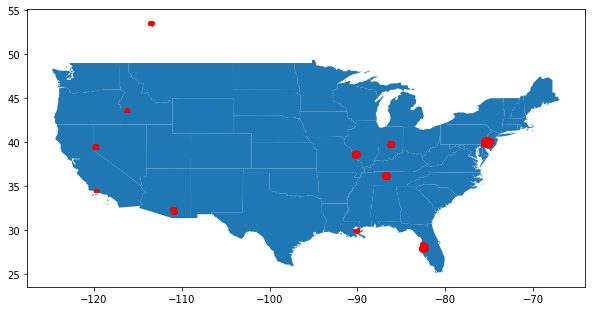

In [41]:
map_path = r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners\data\states_21basic\states.shp'

geometry = [Point(xy) for xy in zip(latlong['longitude'], latlong['latitude'])]
gdf = GeoDataFrame(latlong, geometry=geometry)   

usa = gpd.read_file(map_path)
usa = usa[~usa['STATE_NAME'].isin(['Hawaii','Alaska'])] # exclude HI & AK
gdf.plot(ax=usa.plot(figsize=(10, 6)), marker='o', color='red', markersize=2, alpha=0.2);

## different datasets from kaggle

In [115]:
map_path = r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners\data\states_21basic\states.shp'
def show_cities(dataset=2,print_cities=True,plot_cities=True):
    data_directory = r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners\data\old yelp data' + '\\'
    path = data_directory + 'yelp_academic_dataset_business_version{}.json'.format(dataset)
    df_b = pd.read_json(path, lines=True)

    cities = df_b.city.value_counts()[:100]
    if print_cities:
        print(cities.to_string())

    latlong = df_b[['latitude','longitude']]

    if plot_cities:
        geometry = [Point(xy) for xy in zip(latlong['longitude'], latlong['latitude'])]
        gdf = GeoDataFrame(latlong, geometry=geometry)   
        usa = gpd.read_file(map_path)
        usa = usa[~usa['STATE_NAME'].isin(['Hawaii','Alaska'])] # exclude HI & AK
        gdf.plot(ax=usa.plot(figsize=(10, 6)), marker='o', color='red', markersize=2, alpha=0.2)

In [116]:
datasets = [2,3,4,7,9]

Las Vegas             31631
Toronto               20366
Phoenix               20171
Charlotte             10422
Scottsdale             9342
Calgary                8377
Pittsburgh             7630
Montréal               6979
Mesa                   6577
Henderson              5272
Tempe                  4797
Chandler               4580
Cleveland              3857
Glendale               3824
Gilbert                3745
Madison                3685
Mississauga            3518
Peoria                 2080
Markham                1963
North Las Vegas        1677
Champaign              1327
North York             1319
Scarborough            1244
Surprise               1218
Richmond Hill          1153
Brampton               1146
Concord                1125
Vaughan                1045
Goodyear                951
Etobicoke               841
Matthews                812
Avondale                745
Fort Mill               696
Huntersville            684
Gastonia                564
Lakewood            

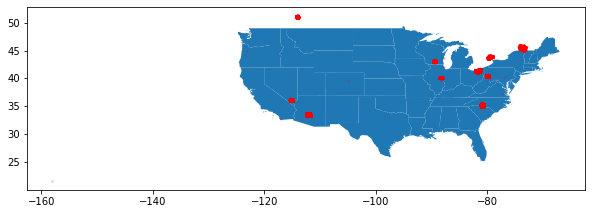

In [117]:
show_cities(2)

Austin               22416
Portland             18203
Vancouver            13330
Atlanta              12612
Orlando              10637
Boston                8263
Columbus              6634
Boulder               2542
Cambridge             2433
Beaverton             2252
Richmond              1791
Burnaby               1725
Kissimmee             1713
Decatur               1411
Winter Park           1288
Somerville            1265
Quincy                1093
Brookline              986
North Vancouver        926
Tigard                 916
Waltham                883
Newton                 823
Smyrna                 820
Altamonte Springs      783
Lake Oswego            761
Dublin                 734
Salem                  721
Sanford                672
Natick                 669
Medford                668
Coquitlam              652
Woburn                 618
Watertown              607
Peabody                602
Burlington             595
Oviedo                 584
Braintree              577
W

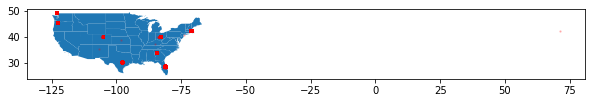

In [118]:
show_cities(3)

Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Wilmington           1446
Franklin             1414
St. Louis            1255
St. Petersburg       1185
Meridian             1043
Brandon              1033
Largo                1002
Carmel                967
Cherry Hill           960
West Chester          838
Goleta                798
Brentwood             767
Palm Harbor           665
Greenwood             649
New Port Richey       604
Lutz                  591
Riverview             588
Kenner                584
Fishers               570
King of Prussia       560
Wesley Chapel         560
Doylestown            539
Pinellas Park         512
Dunedin     

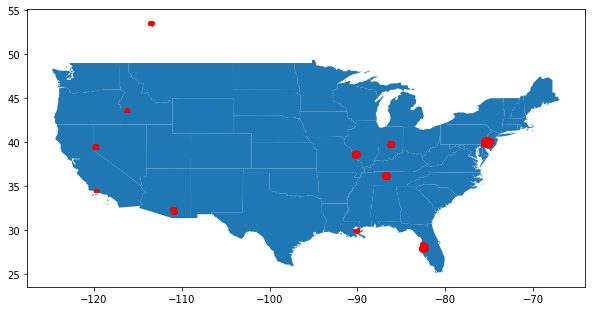

In [119]:
show_cities(4)

Las Vegas            28865
Phoenix              18633
Toronto              18233
Charlotte             9204
Scottsdale            8822
Calgary               7384
Pittsburgh            6804
Mesa                  6239
Montréal              6045
Henderson             4815
Tempe                 4492
Chandler              4272
Madison               3509
Cleveland             3506
Glendale              3469
Gilbert               3397
Mississauga           2954
Peoria                1868
Markham               1699
North Las Vegas       1508
Champaign             1243
Scarborough           1175
North York            1140
Surprise              1119
Richmond Hill          978
Concord                975
Brampton               929
Vaughan                853
Goodyear               827
Etobicoke              760
Matthews               726
Oakville               699
Avondale               663
Fort Mill              620
Huntersville           608
Lakewood               509
Gastonia               494
C

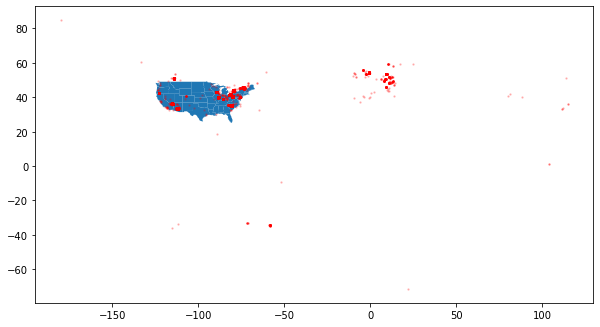

In [120]:
show_cities(7)

Las Vegas             29370
Toronto               18906
Phoenix               18766
Charlotte              9509
Scottsdale             8837
Calgary                7736
Pittsburgh             7017
Montréal               6449
Mesa                   6080
Henderson              4892
Tempe                  4550
Chandler               4309
Cleveland              3605
Glendale               3543
Madison                3494
Gilbert                3462
Mississauga            3112
Peoria                 1919
Markham                1766
North Las Vegas        1548
Champaign              1262
North York             1205
Surprise               1148
Scarborough            1103
Richmond Hill          1026
Brampton               1002
Concord                 990
Vaughan                 919
Goodyear                855
Etobicoke               793
Matthews                749
Avondale                681
Fort Mill               627
Huntersville            625
Lakewood                519
Gastonia            

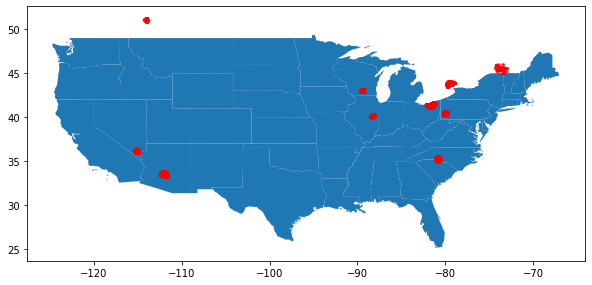

In [121]:
show_cities(9)

## Austin dataset from 2021 yelp academic dataset

# Inspection data

In [124]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML-data science\DataIncubator\yelp-cleaners\data\Inspection data\Austin\Food_Establishment_Inspection_Scores.csv',
                delimiter = ',', on_bad_lines='skip')

In [155]:
# addresses are formatted as Address \n city, state, zip \n (lat, long)
# most of them have lat long
df.Address.str.split('\n').str.len().value_counts()

3    22371
2     3413
Name: Address, dtype: int64

In [156]:
df.Address.str.split('\n')[2]

['8628 MANCHACA RD', 'AUSTIN, TX 78748']

In [141]:
df.Address.str.split()[0]

['325', 'S', 'FM', '620', 'RD', 'LAKEWAY,', 'TX', '78734']

In [137]:
df.Address.value_counts()

3600 PRESIDENTIAL BLVD\nAUSTIN, TX 78719\n(30.202592, -97.666956)         169
2901 S CAPITAL OF TEXAS HWY\nAUSTIN, TX 78746\n(30.255443, -97.810066)    112
11200 LAKELINE MALL DR\nAUSTIN, TX 78613\n(30.47186, -97.802769)           92
2525 W ANDERSON LN\nAUSTIN, TX 78757\n(30.356679, -97.732239)              86
10901 N LAMAR BLVD\nAUSTIN, TX 78753\n(30.378477, -97.688329)              78
                                                                         ... 
1115 BASTROP HWY\nAUSTIN, TX 78742\n(30.228434, -97.682454)                 1
603 BRAZOS ST\nAUSTIN, TX 78701\n(30.267859, -97.741403)                    1
1300 LAVACA ST\nAUSTIN, TX 78701\n(30.276016, -97.742513)                   1
1708 MONTOPOLIS DR\nAUSTIN, TX 78741\n(30.226758, -97.702277)               1
6001 MANCHACA RD\nAUSTIN, TX 78745\n(30.212953, -97.801829)                 1
Name: Address, Length: 4025, dtype: int64

(array([1.000e+00, 0.000e+00, 6.000e+00, 7.000e+00, 1.000e+01, 2.300e+01,
        4.900e+01, 5.000e+01, 4.700e+01, 2.790e+02, 4.010e+02, 6.120e+02,
        9.400e+02, 1.385e+03, 1.313e+03, 2.470e+03, 3.617e+03, 4.333e+03,
        4.799e+03, 5.442e+03]),
 array([ 44. ,  46.8,  49.6,  52.4,  55.2,  58. ,  60.8,  63.6,  66.4,
         69.2,  72. ,  74.8,  77.6,  80.4,  83.2,  86. ,  88.8,  91.6,
         94.4,  97.2, 100. ]),
 <BarContainer object of 20 artists>)

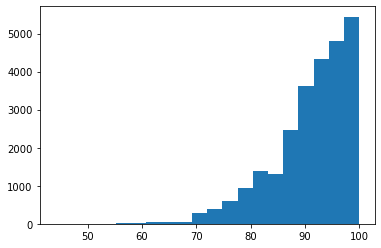

In [135]:
plt.hist(df.Score,bins=20)

In [128]:
df['Restaurant Name']

Thundercloud Subs                        80
Subway                                   64
Tokyo Gardens Catering                   60
Torchy's Tacos                           57
P. Terry's Burger Stand                  52
                                         ..
Cuerney Bar & Grill                       1
COTA- Austin Smoque Maind Grand Stand     1
HandleBar                                 1
Eastern, The                              1
Slapbox Pizzicheria                       1
Name: Restaurant Name, Length: 5984, dtype: int64

# old junk

## 2015-2018 LA restaurant inspections

Found a 2015-2018 dataset at https://data.lacity.org/Community-Economic-Development/Restaurant-and-Market-Health-Inspections/29fd-3paw, exported as CSV file. Can also access json entries via their API.

In [82]:
df = pd.read_csv('data/Los Angeles/Restaurant_and_Market_Health_Inspections.csv')

In [83]:
df.columns

Index(['serial_number', 'activity_date', 'facility_name', 'score', 'grade',
       'service_code', 'service_description', 'employee_id',
       'facility_address', 'facility_city', 'facility_id', 'facility_state',
       'facility_zip', 'owner_id', 'owner_name', 'pe_description',
       'program_element_pe', 'program_name', 'program_status', 'record_id'],
      dtype='object')

In [84]:
df.facility_address

0               3708 N EAGLE ROCK BLVD
1                  100 WORLD WAY # 120
2            6801 HOLLYWOOD BLVD # 253
3                   1814 W SUNSET BLVD
4                   2100 ECHO PARK AVE
                     ...              
67568    104 JAPANESE VILLAGE PLZ MALL
67569           4050 W WASHINGTON BLVD
67570                     4312 WALL ST
67571               2012 SAWTELLE BLVD
67572        3600 E CESAR E CHAVEZ AVE
Name: facility_address, Length: 67573, dtype: object

In [85]:
df.activity_date = pd.to_datetime(df.activity_date)

In [86]:
print(min(df.activity_date))
print(max(df.activity_date))

2015-07-01 00:00:00
2018-07-31 00:00:00


In [87]:
len(pd.unique(df.facility_name))

12071

In [88]:
df[["score","grade"]].groupby('grade').agg({"score": [min, np.mean, max]})

score                
        min       mean  max
grade                      
         65  65.000000   65
A        90  94.087338  100
B        80  83.788204   89
C        64  74.048193   79

In [97]:
df[df.facility_name.str.contains('BOBA|TEA|COFFEE')].facility_name.value_counts()

THE COFFEE BEAN & TEA LEAF    147
BLUE BOTTLE COFFEE             32
I LOVE BOBA                    27
BOBA TIME                      23
IT'S BOBA TIME                 22
                             ... 
STARBUCKS COFFEE #5296          1
HASHTAG#COFFEE&TEA              1
FICKLE TEA LOUNGE               1
ST VINCENT COFFEE SHOP          1
MEDIDATE COFFEE                 1
Name: facility_name, Length: 378, dtype: int64

In [23]:
df.value_counts('facility_name')

facility_name
DODGER STADIUM           464
STAPLES CENTER (LEVY)    290
LA COLISEUM              225
WHOLE FOODS MARKET       208
SUBWAY                   155
                        ... 
THE PIANO BAR              1
ANZIO CAFE                 1
FUEGO NIGHT CLUB           1
QDOBA MEXICAN GRILL        1
MARKS LIQUOR               1
Length: 12071, dtype: int64

In [26]:
df.value_counts('facility_id')

facility_id
FA0019271    464
FA0006427    290
FA0065100    225
FA0024180    117
FA0156500    103
            ... 
FA0247928      1
FA0042091      1
FA0163817      1
FA0042050      1
FA0262447      1
Length: 13545, dtype: int64

In [30]:
df.facility_address == "3708 N EAGLE ROCK BLVD"

0         True
1        False
2        False
3        False
4        False
         ...  
67568    False
67569    False
67570    False
67571    False
67572    False
Name: facility_address, Length: 67573, dtype: bool

## more recent LA restaurant inspections

More recent but smaller dataset at https://ehservices.publichealth.lacounty.gov/ezsearch

In [75]:
columns = ['facility_name','inspection_date','score','facility_address','facility_city']
df = pd.read_csv('inspections.csv',names=columns)
# lots of restaurants without scores, weirdly
df = df.dropna().reset_index(drop=True)

In [76]:
df.value_counts('facility_address')

facility_address
762 E SLAUSON AVE         222
7782 SAN FERNANDO RD      145
100 UNIVERSAL CITY PLZ    138
1000 S PRAIRIE AVE        126
1000 VIN SCULLY AVE       118
                         ... 
18438 COLIMA RD 12          1
18438 COLIMA RD #105        1
18438 COLIMA # 1            1
18434 DEVONSHIRE ST         1
S VERMONT AVE               1
Length: 35749, dtype: int64

lots of wrong addresses here... e.g., "TAQUERIA SAN MIGUEL ESTILO TIJUANA" is on Yelp at 1012 Hooper Ave ( https://www.yelp.com/biz/taqueria-san-miguel-los-angeles )

In [79]:
# lots of wrong addresses here
# e.g., "TAQUERIA SAN MIGUEL ESTILO TIJUANA" is on Yelp at 
df[df.facility_address == '762 E SLAUSON AVE']

,facility_name,inspection_date,score,facility_address,facility_city
172,TAQUERIA SAN MIGUEL ESTILO TIJUANA,2022-01-25,93.0,762 E SLAUSON AVE,LOS ANGELES
545,TACOS MR.HIDRO,2019-09-23,90.0,762 E SLAUSON AVE,LOS ANGELES
568,CELIA'S FOODS,2020-06-22,97.0,762 E SLAUSON AVE,LOS ANGELES
667,PALOMA CELESTIAL #2,2022-03-22,94.0,762 E SLAUSON AVE,LOS ANGELES
1111,LOS AMIGOS FOOD TRUCK,2022-02-24,90.0,762 E SLAUSON AVE,LOS ANGELES
...,...,...,...,...,...
44895,CHICKEN KING FT,2021-10-30,95.0,762 E SLAUSON AVE,LOS ANGELES
44918,ESPERANZA TACOS GRILL,2022-02-24,90.0,762 E SLAUSON AVE,LOS ANGELES
44929,TACOS LOS AMIGOS,2022-03-17,86.0,762 E SLAUSON AVE,LOS ANGELES
44938,GLENDA'S CATERING,2022-03-08,90.0,762 E SLAUSON AVE,LOS ANGELES


In [36]:
df.columns

Index(['ARIEL COURT APTS SPA POOL', '2020-01-31', 'Unnamed: 2',
       '535 GAYLEY AVE ', 'LOS ANGELES'],
      dtype='object')

In [7]:
df.facility_address

0               3708 N EAGLE ROCK BLVD
1                  100 WORLD WAY # 120
2            6801 HOLLYWOOD BLVD # 253
3                   1814 W SUNSET BLVD
4                   2100 ECHO PARK AVE
                     ...              
67568    104 JAPANESE VILLAGE PLZ MALL
67569           4050 W WASHINGTON BLVD
67570                     4312 WALL ST
67571               2012 SAWTELLE BLVD
67572        3600 E CESAR E CHAVEZ AVE
Name: facility_address, Length: 67573, dtype: object

## etc